In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("data/bank-additional-full.csv", sep=';')

# Преобразование целевой переменной
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Разделение признаков на числовые и категориальные
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [39]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [40]:
def remove_duplicates(df):
    """Удаление дубликатов"""
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]
    print(f"Удалено {before - after} дубликатов.")
    return df

df = remove_duplicates(df)

Удалено 12 дубликатов.


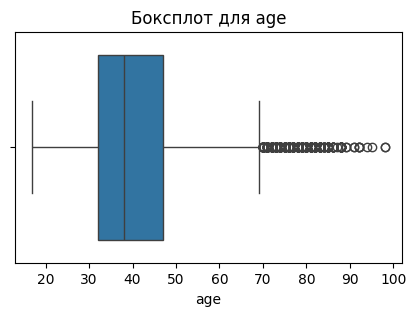

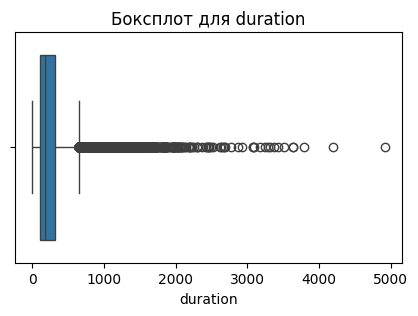

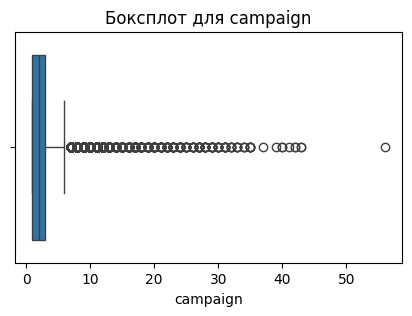

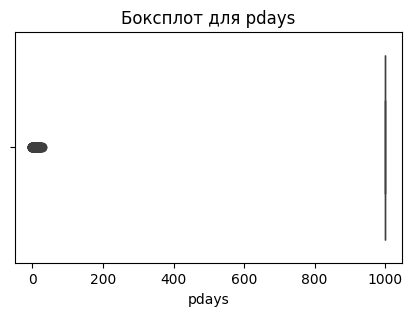

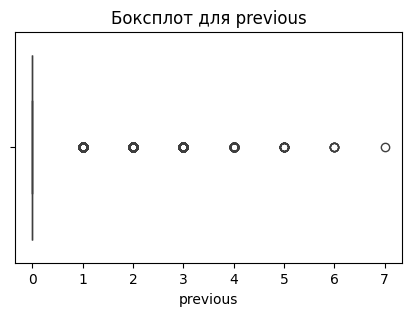

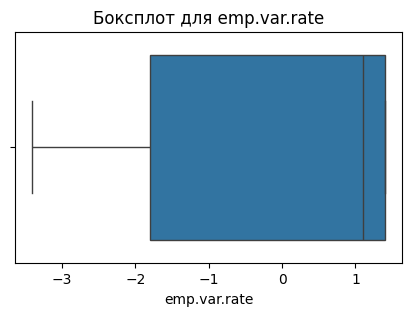

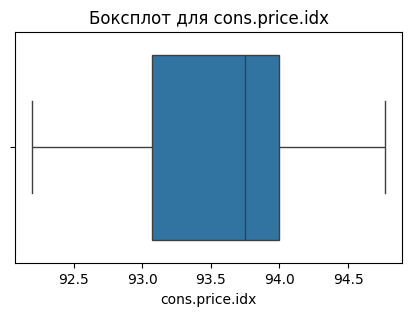

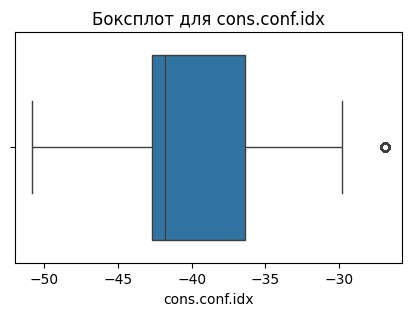

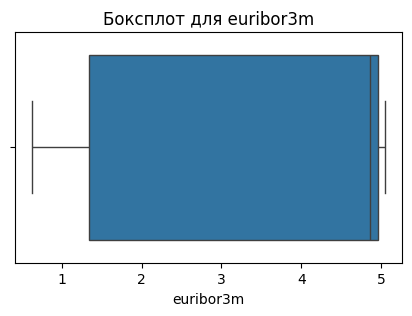

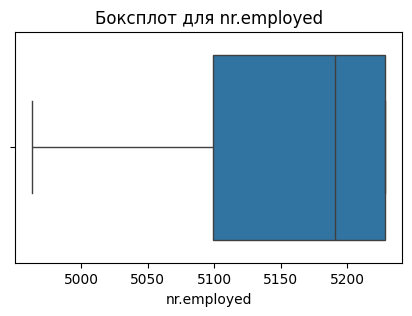

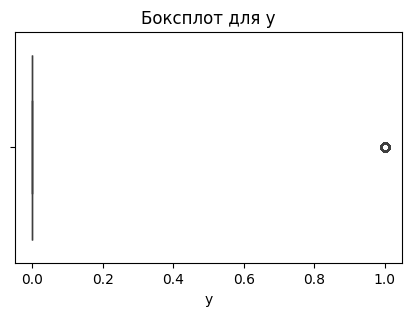

Количество выбросов по полям:
{'age': 468, 'duration': 2963, 'campaign': 2406, 'pdays': 1515, 'previous': 5625, 'emp.var.rate': 0, 'cons.price.idx': 0, 'cons.conf.idx': 446, 'euribor3m': 0, 'nr.employed': 0, 'y': 4639}


{'age': 468,
 'duration': 2963,
 'campaign': 2406,
 'pdays': 1515,
 'previous': 5625,
 'emp.var.rate': 0,
 'cons.price.idx': 0,
 'cons.conf.idx': 446,
 'euribor3m': 0,
 'nr.employed': 0,
 'y': 4639}

In [41]:
def detect_outliers(df):
    """Построение боксплотов и подсчет количества выбросов"""
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    outliers_count = {}
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
        
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=df[col])
        plt.title(f'Боксплот для {col}')
        plt.show()
    
    print("Количество выбросов по полям:")
    print(outliers_count)
    return outliers_count

detect_outliers(df)

In [42]:
#null ("unknown") percentage with round(2)

np.round((df == "unknown").sum()*100/len(df),2)

age                0.00
job                0.80
marital            0.19
education          4.20
default           20.88
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
y                  0.00
dtype: float64

In [43]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [44]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


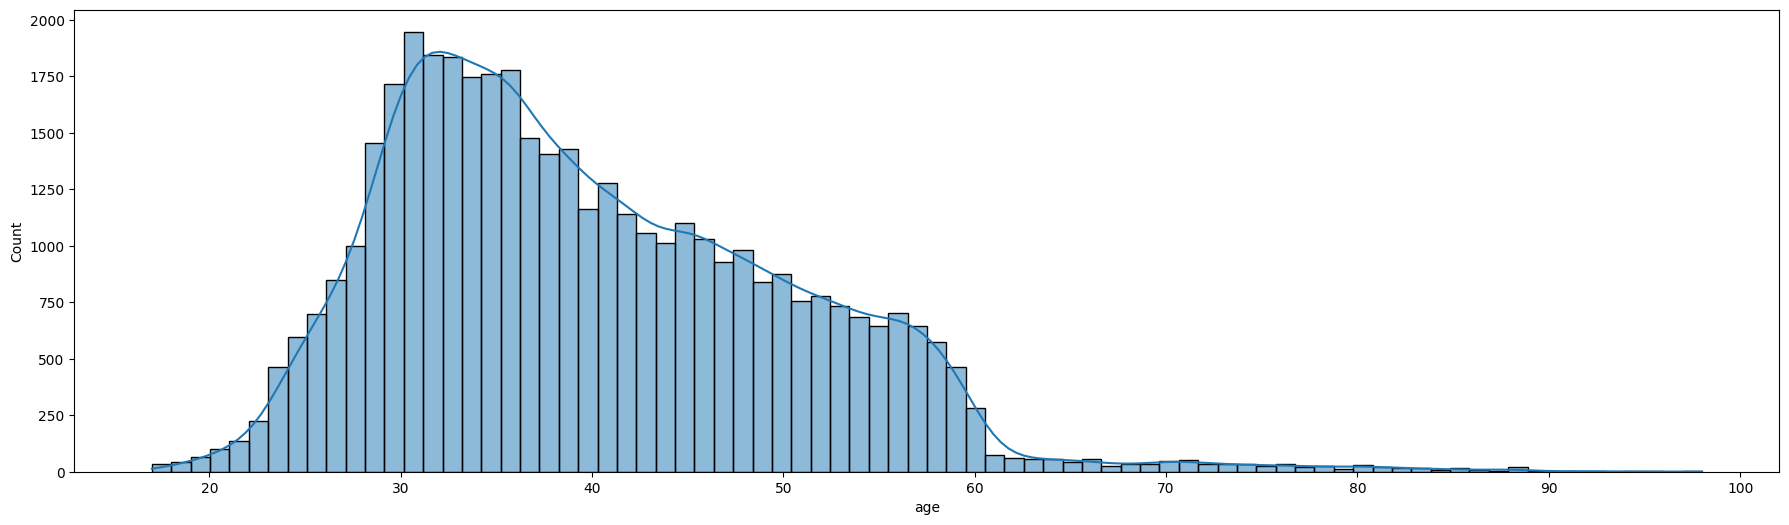

In [45]:
#age histogram

plt.figure(figsize=(22, 6))
sns.histplot(df['age'], kde=True, bins=80)
plt.show()

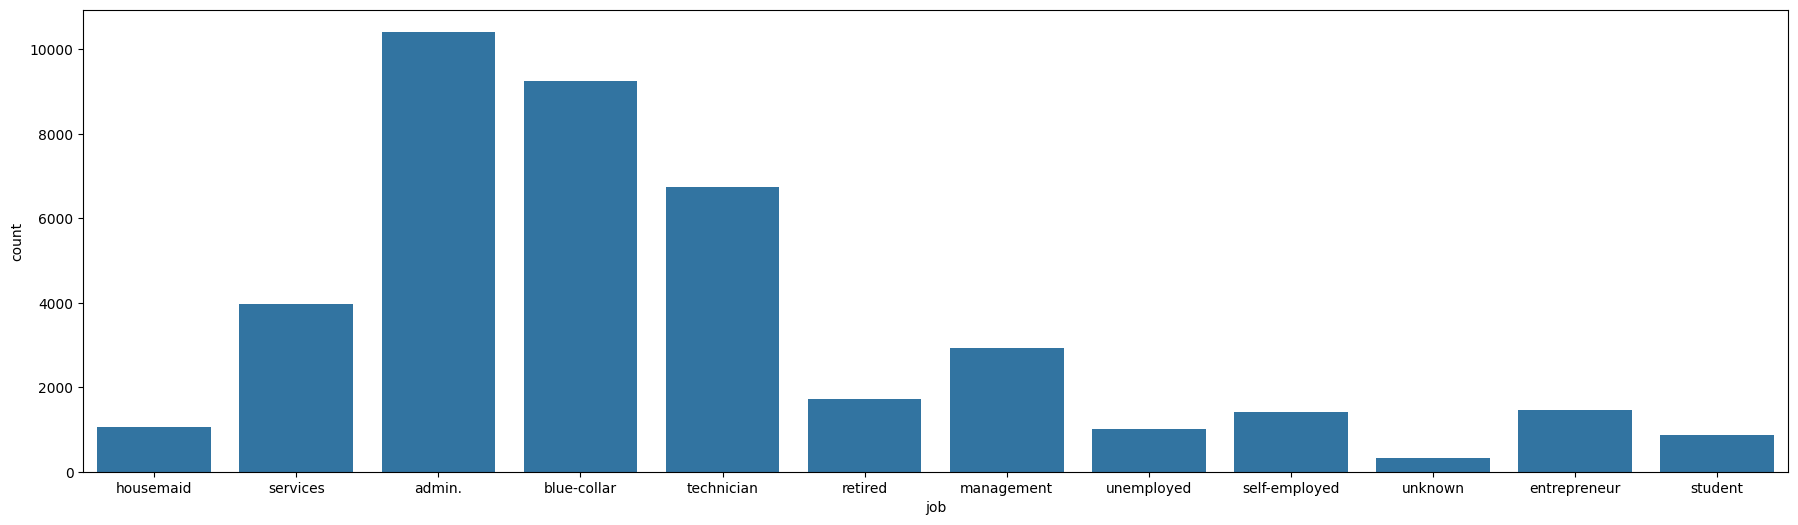

In [46]:
# job bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='job', data=df)
plt.show()

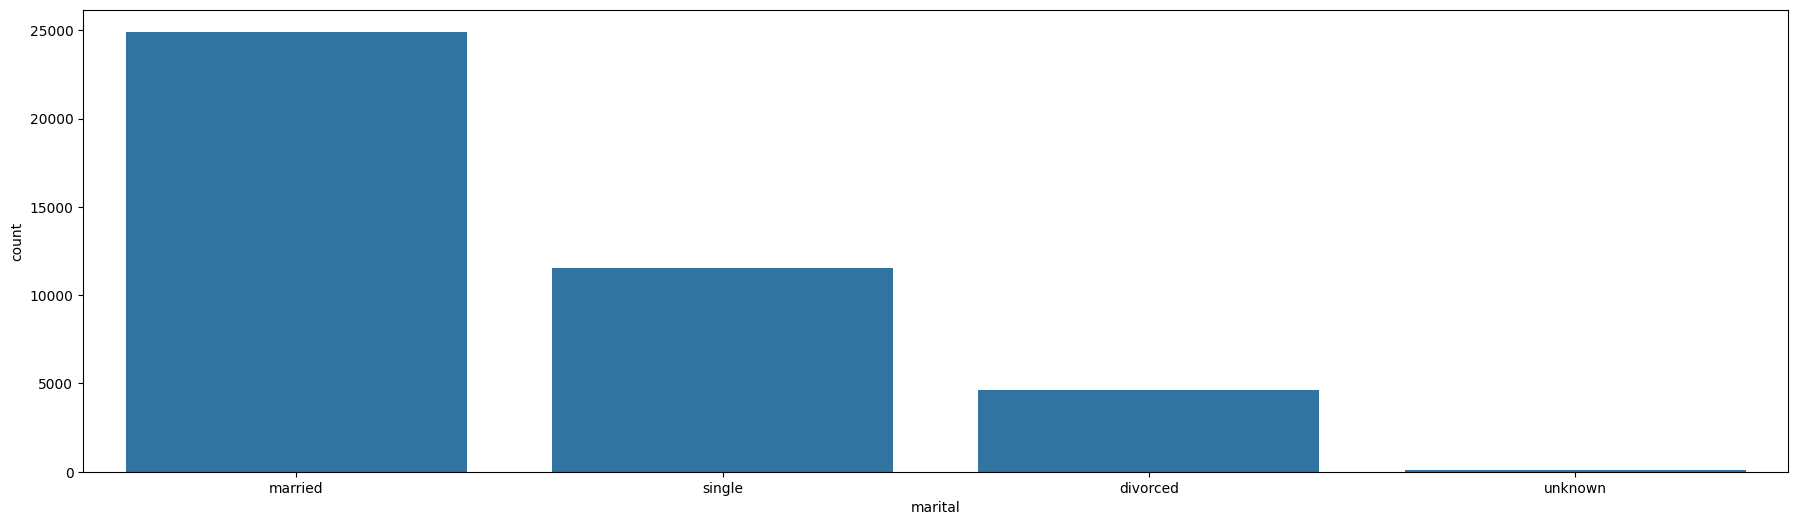

In [47]:
#marital bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='marital', data=df)
plt.show()

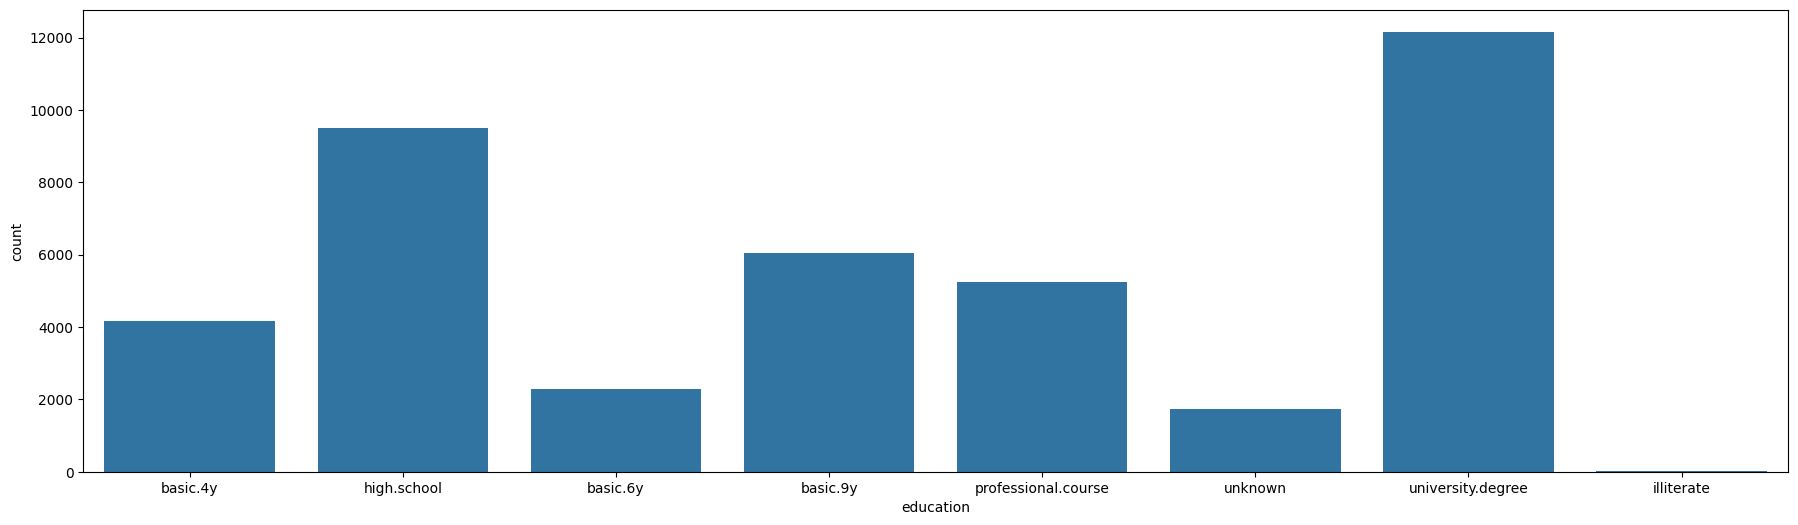

In [48]:
#education bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='education', data=df)
plt.show()

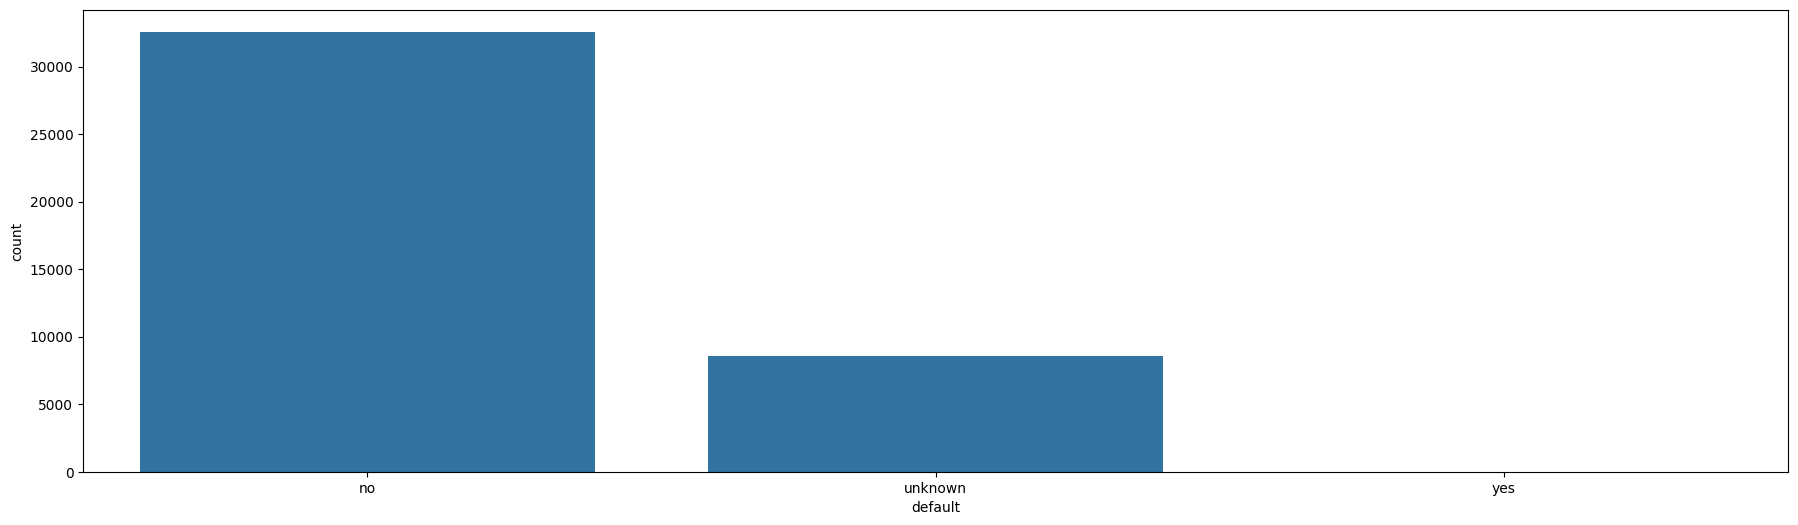

In [49]:
#default bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='default', data=df)
plt.show()

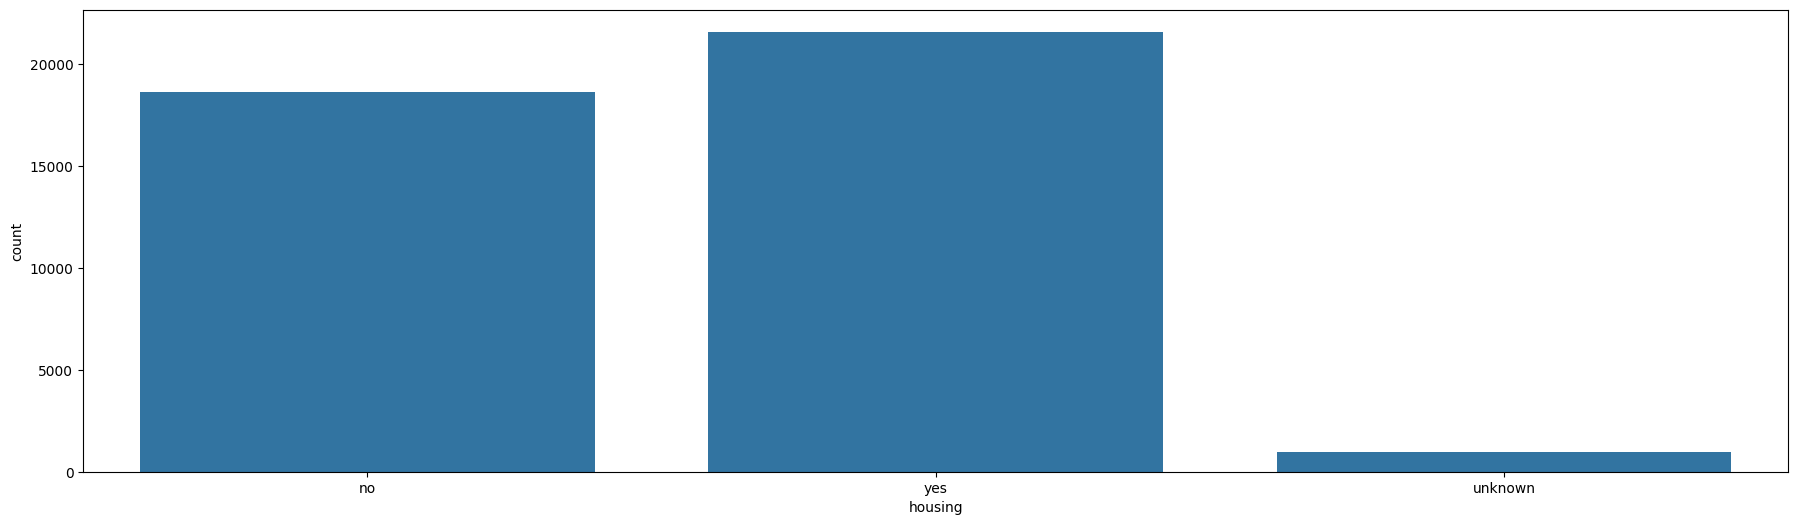

In [50]:
#housing bar plot

plt.figure(figsize=(22, 6)) 
sns.countplot(x='housing', data=df)
plt.show()

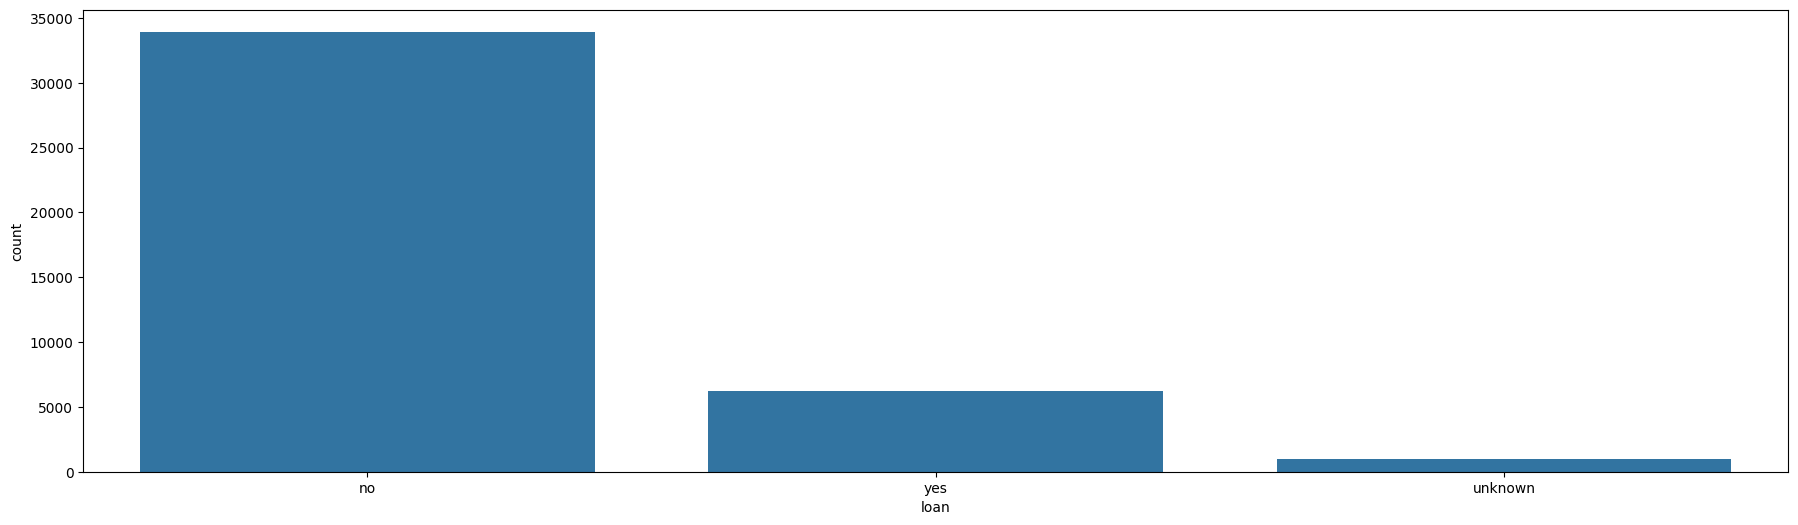

In [51]:
#loan bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='loan', data=df)
plt.show()

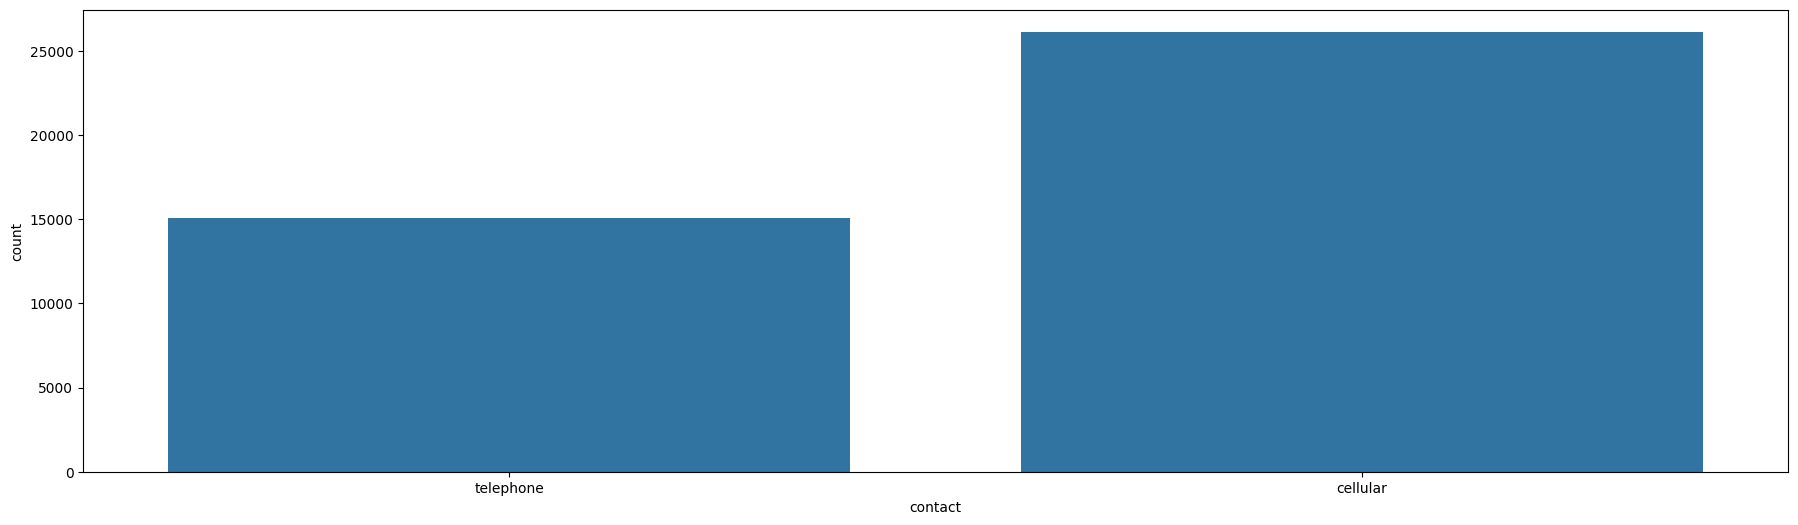

In [52]:
#contact bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='contact', data=df)
plt.show()

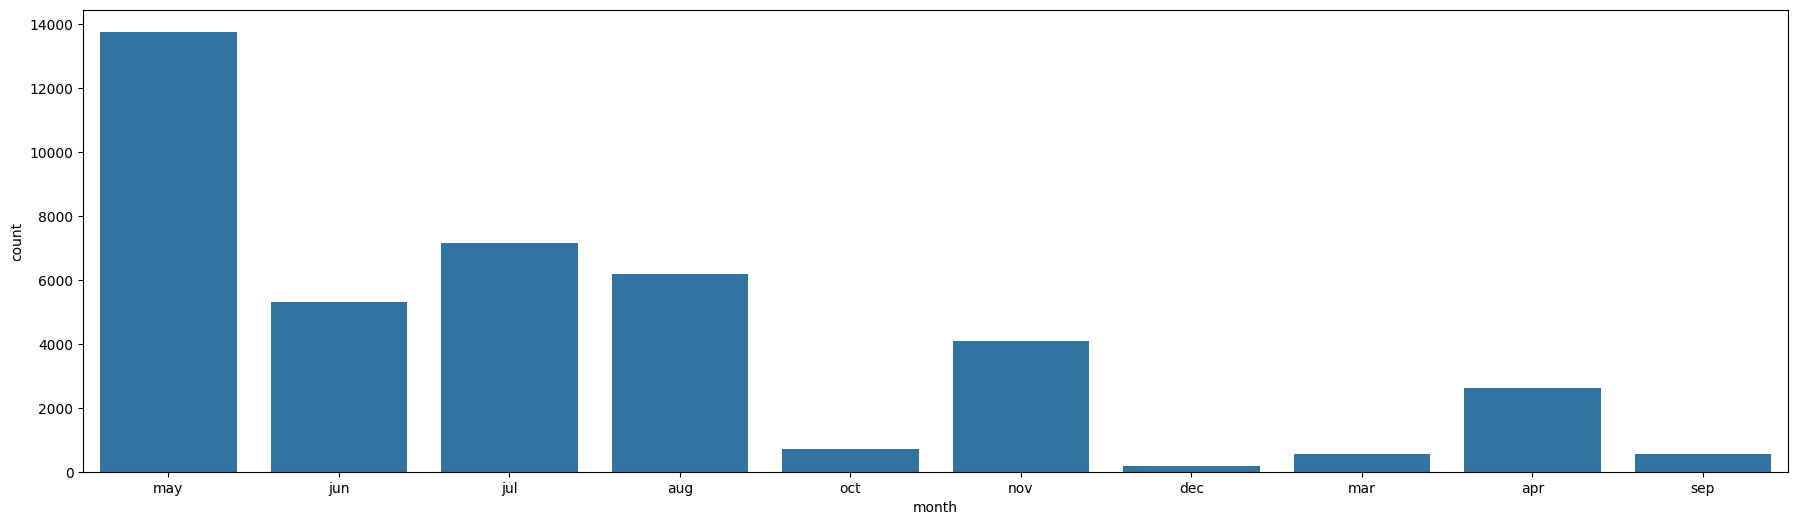

In [53]:
#month bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='month', data=df)
plt.show()  

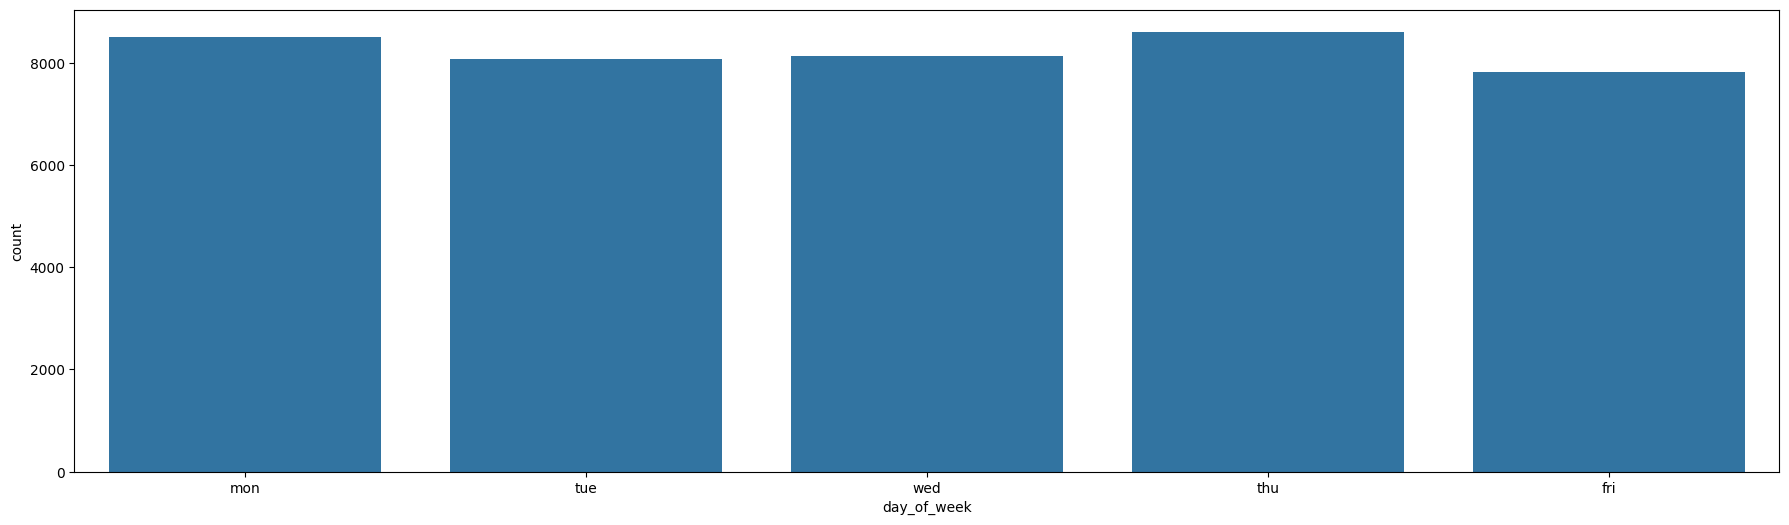

In [54]:
#day_of_week bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='day_of_week', data=df)
plt.show()

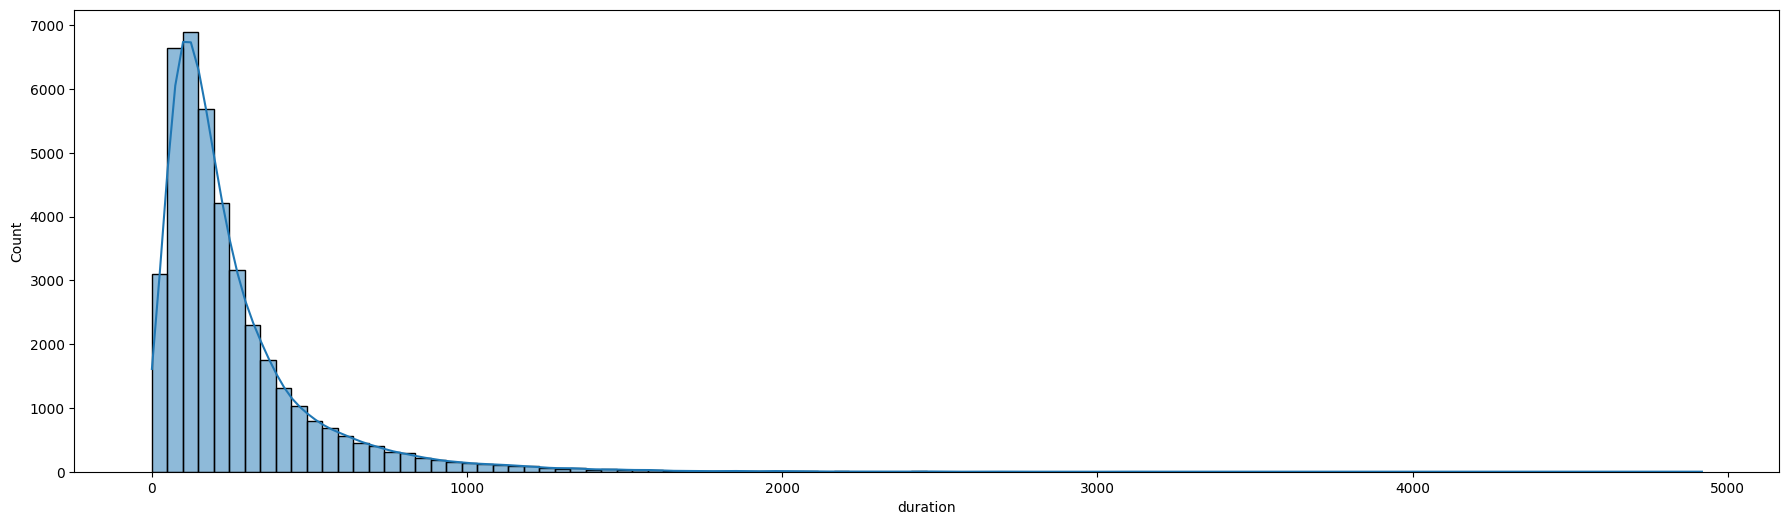

In [55]:
#duration histogram

plt.figure(figsize=(22, 6))
sns.histplot(df['duration'], kde=True, bins=100)
plt.show()

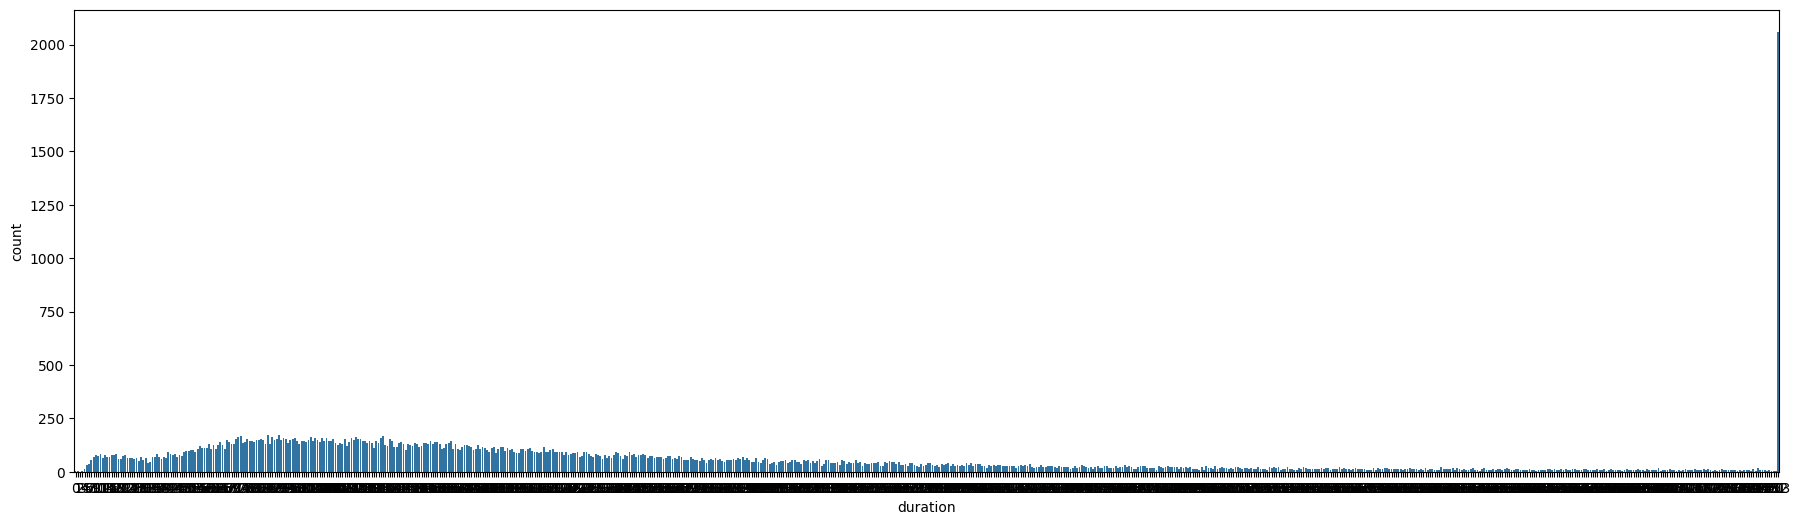

In [ ]:
df['duration'] = df['duration'].clip(upper=df['duration'].quantile(0.95))

plt.figure(figsize=(22, 6))
sns.histplot(df['duration'], kde=True, bins=100)
plt.show()

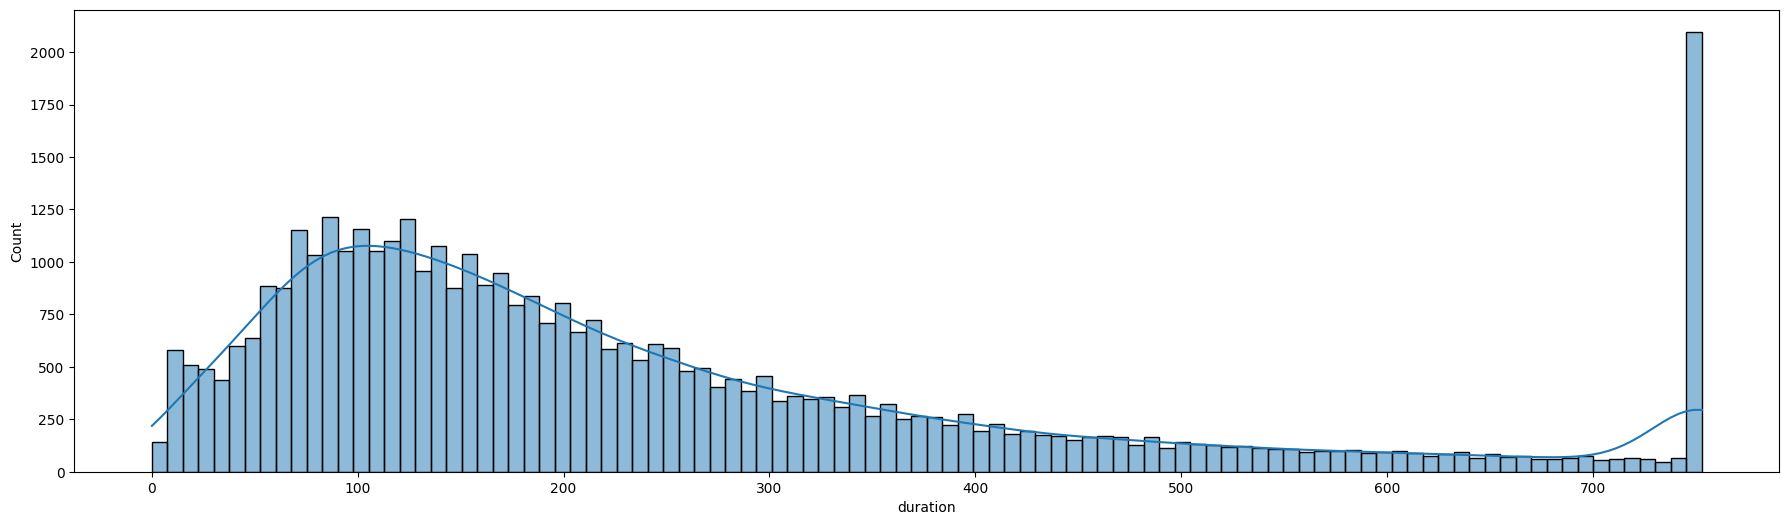

In [73]:
plt.figure(figsize=(22, 6))
sns.histplot(df['duration'], kde=True, bins=100)
plt.show()

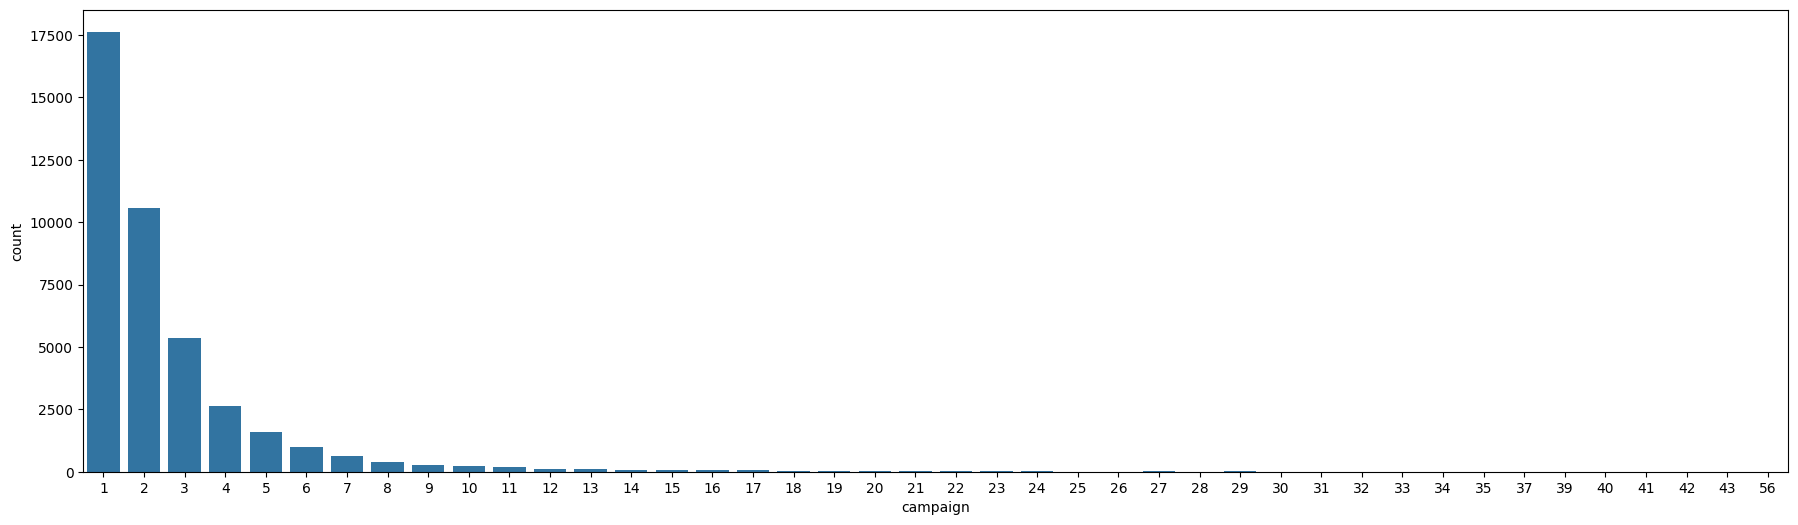

In [57]:
#campaign count plot

plt.figure(figsize=(22, 6)) 
sns.countplot(x='campaign', data=df)
plt.show()

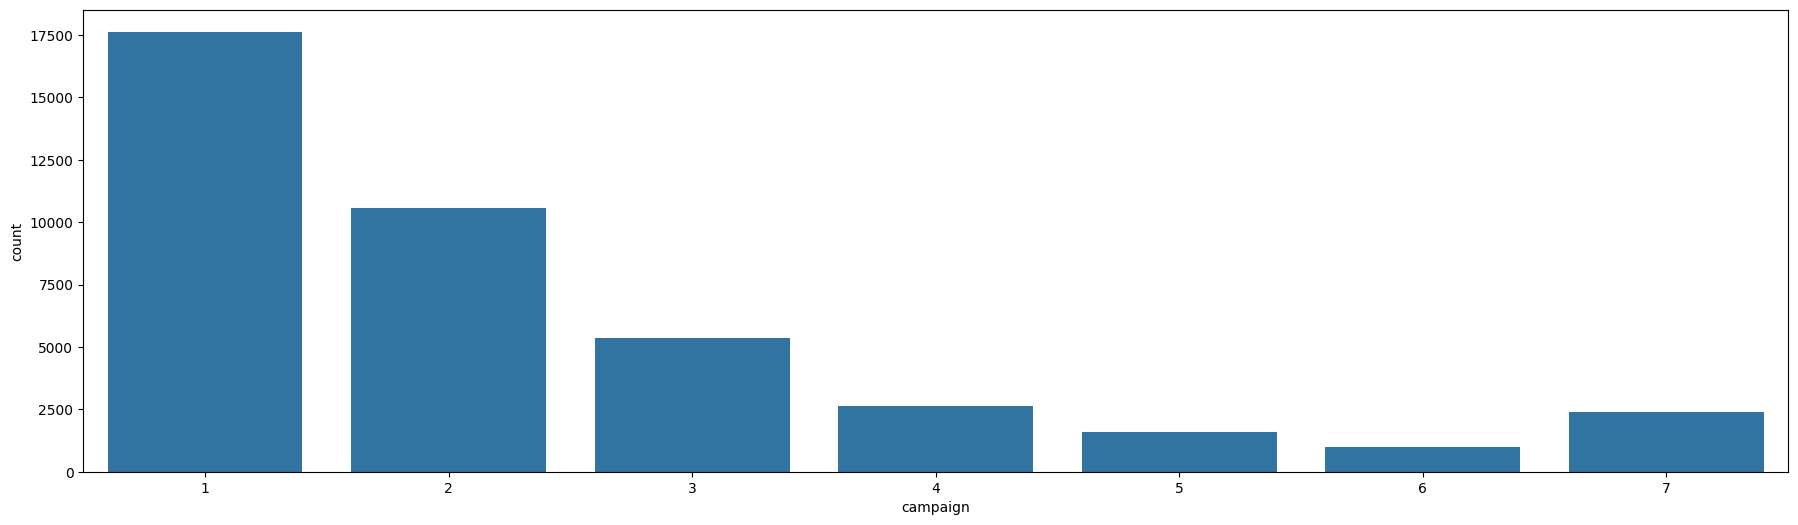

In [58]:
df['campaign'] = df['campaign'].clip(upper=df['campaign'].quantile(0.95))

plt.figure(figsize=(22, 6)) 
sns.countplot(x='campaign', data=df)
plt.show()

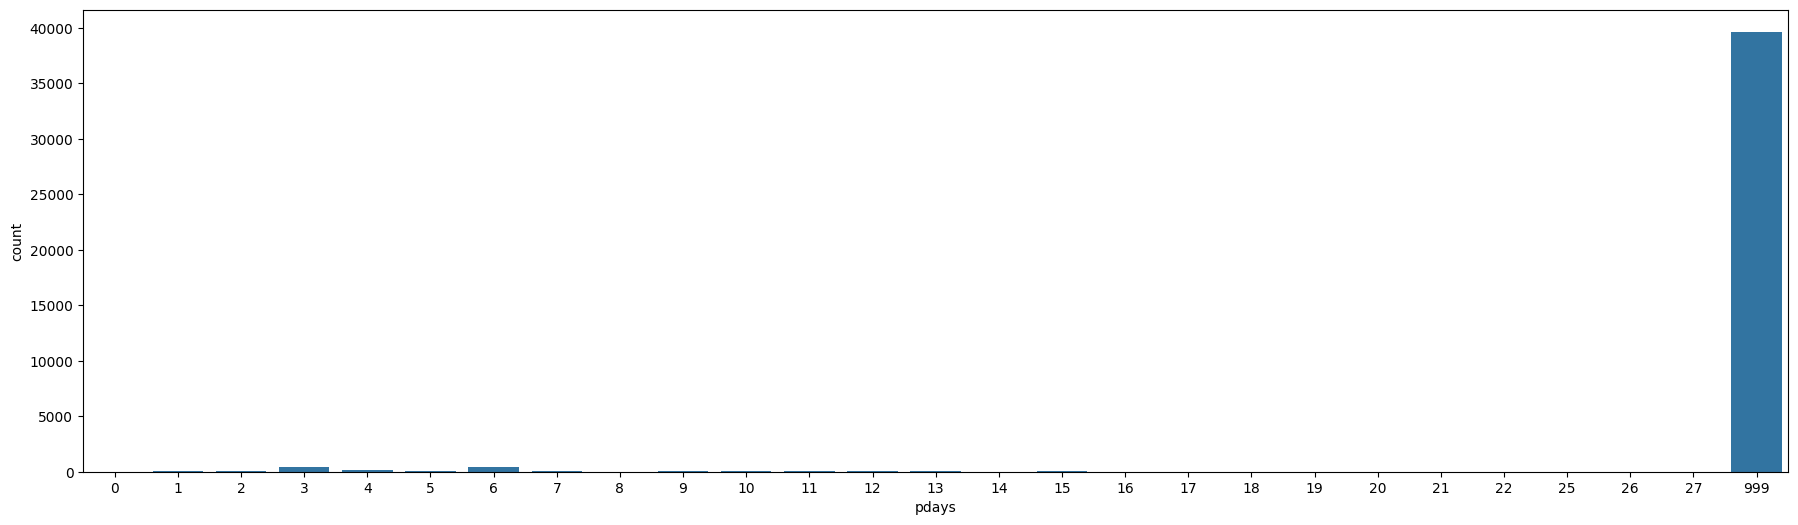

In [59]:
#pdays count plot

plt.figure(figsize=(22, 6))
sns.countplot(x='pdays', data=df)
plt.show()

In [60]:
df['pdays_was_contacted'] = (df['pdays'] != 999).astype(int)
df.drop('pdays', axis=1, inplace=True)

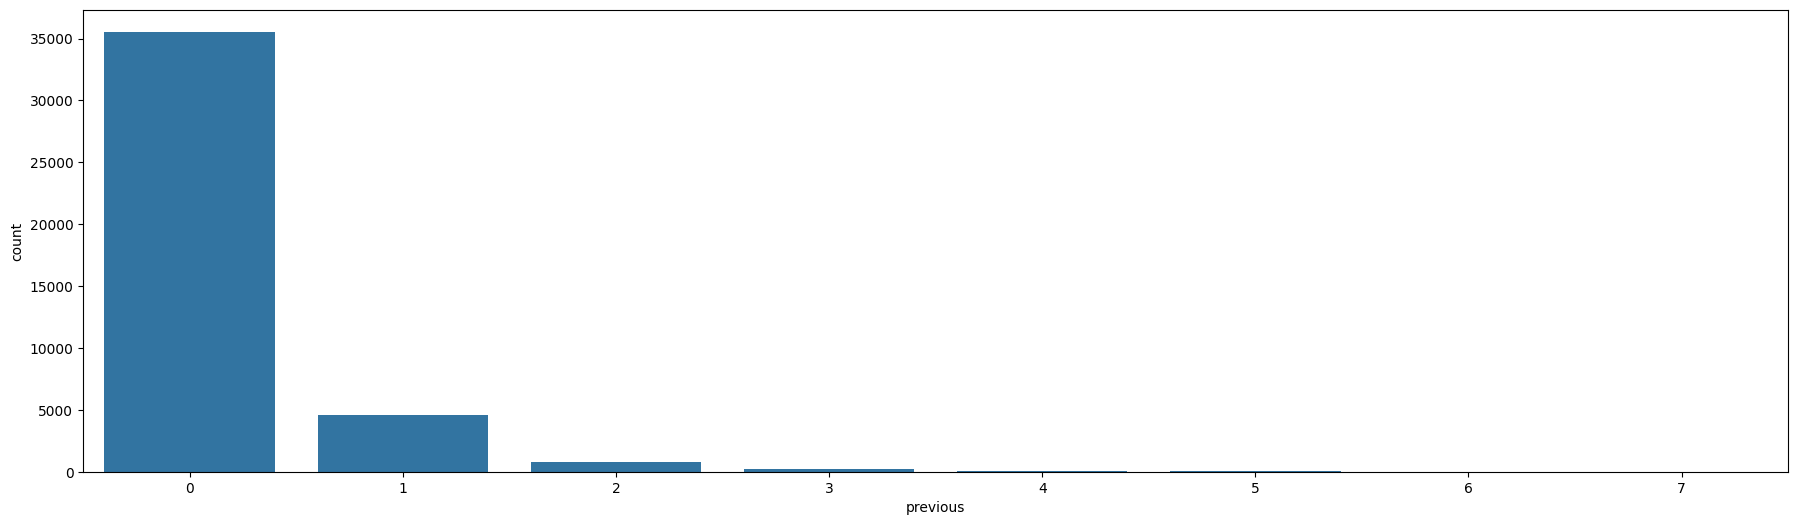

In [61]:
#previous count plot

plt.figure(figsize=(22, 6))
sns.countplot(x='previous', data=df)    
plt.show()

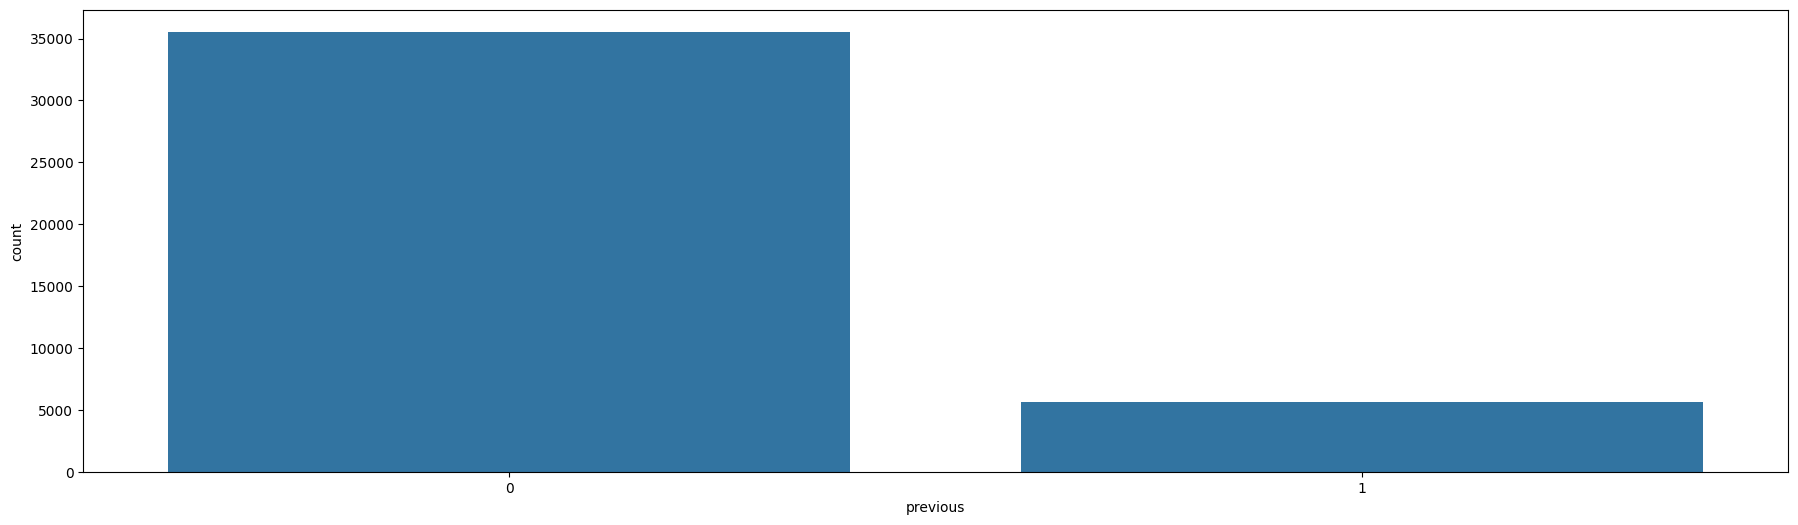

In [62]:
df['previous'] = df['previous'].clip(upper=df['previous'].quantile(0.95))

plt.figure(figsize=(22, 6)) 
sns.countplot(x='previous', data=df)
plt.show()

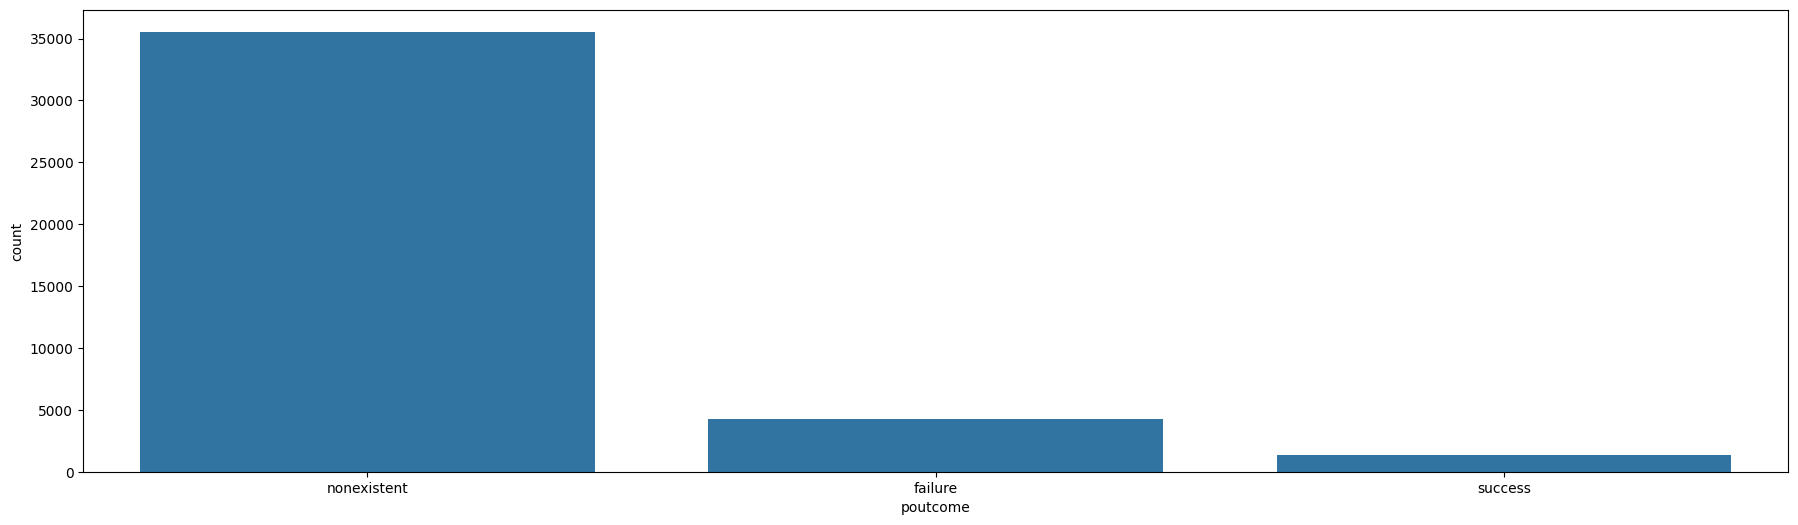

In [63]:
#poutcome bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='poutcome', data=df)
plt.show()

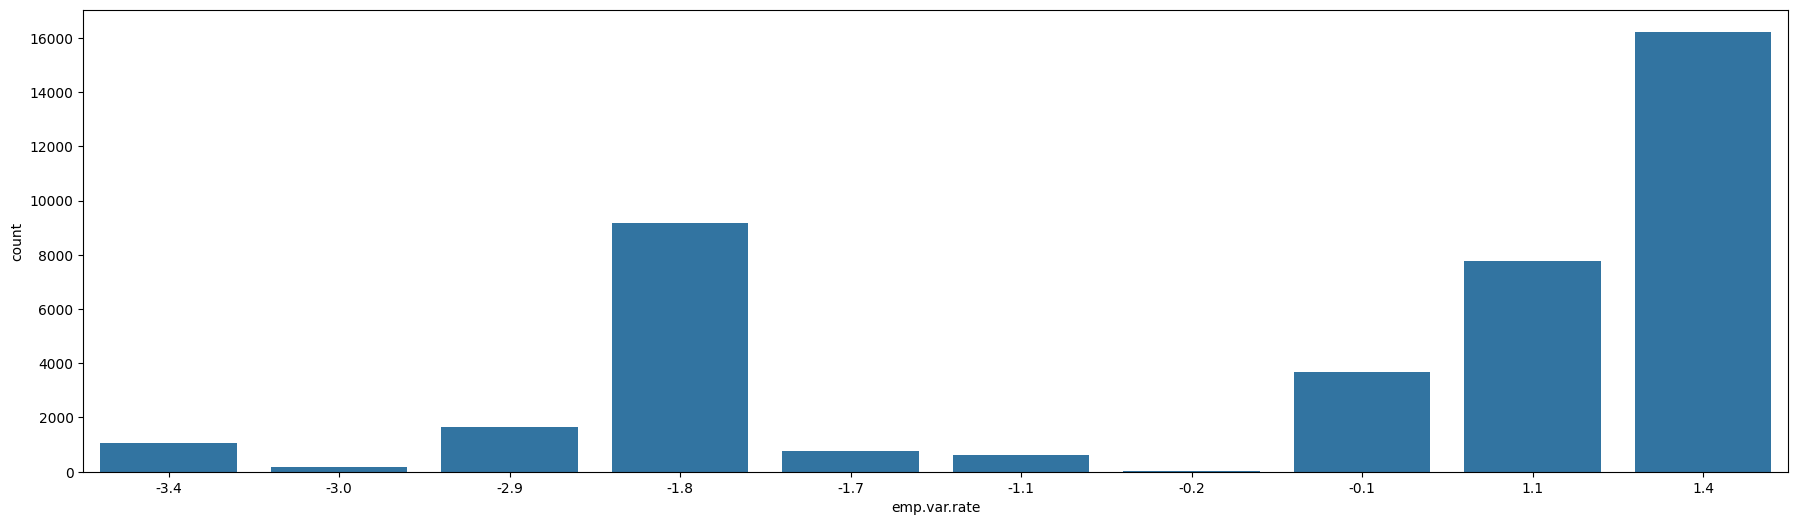

In [64]:
#emp.var.rate bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='emp.var.rate', data=df)
plt.show()

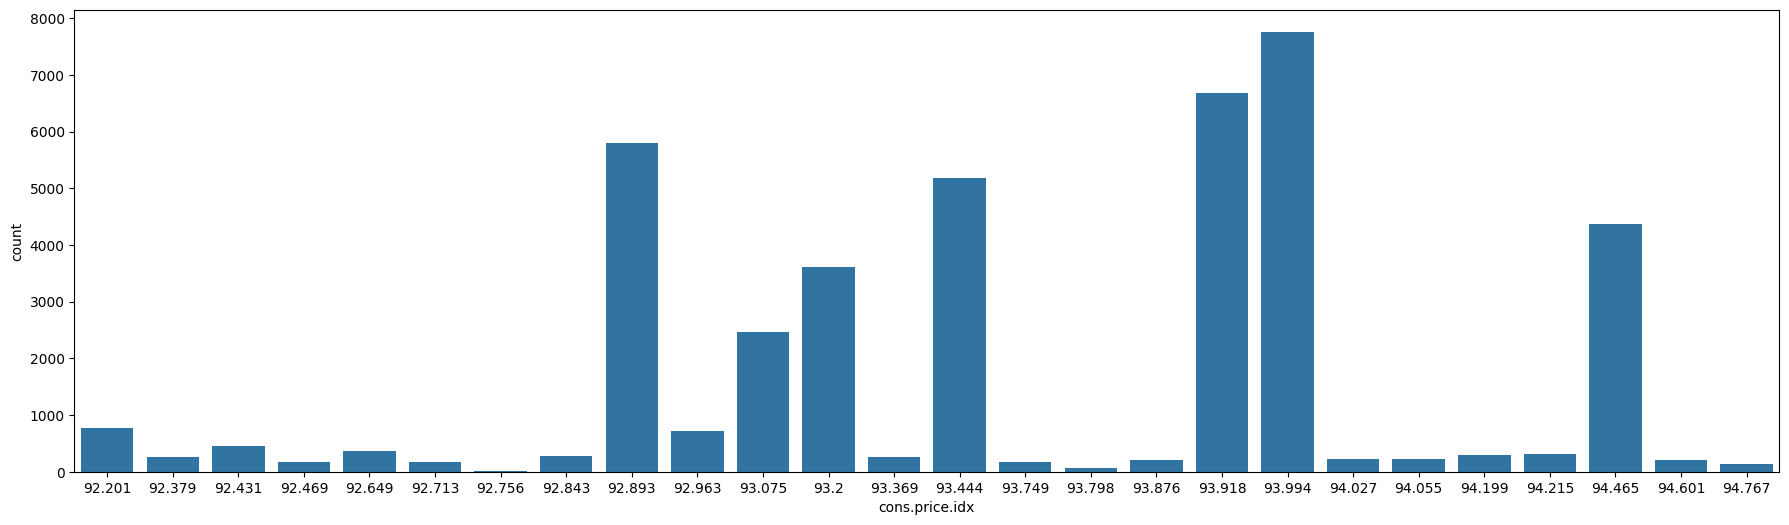

In [65]:
#cons.price.idx bar plot

plt.figure(figsize=(22, 6)) 
sns.countplot(x='cons.price.idx', data=df)
plt.show()

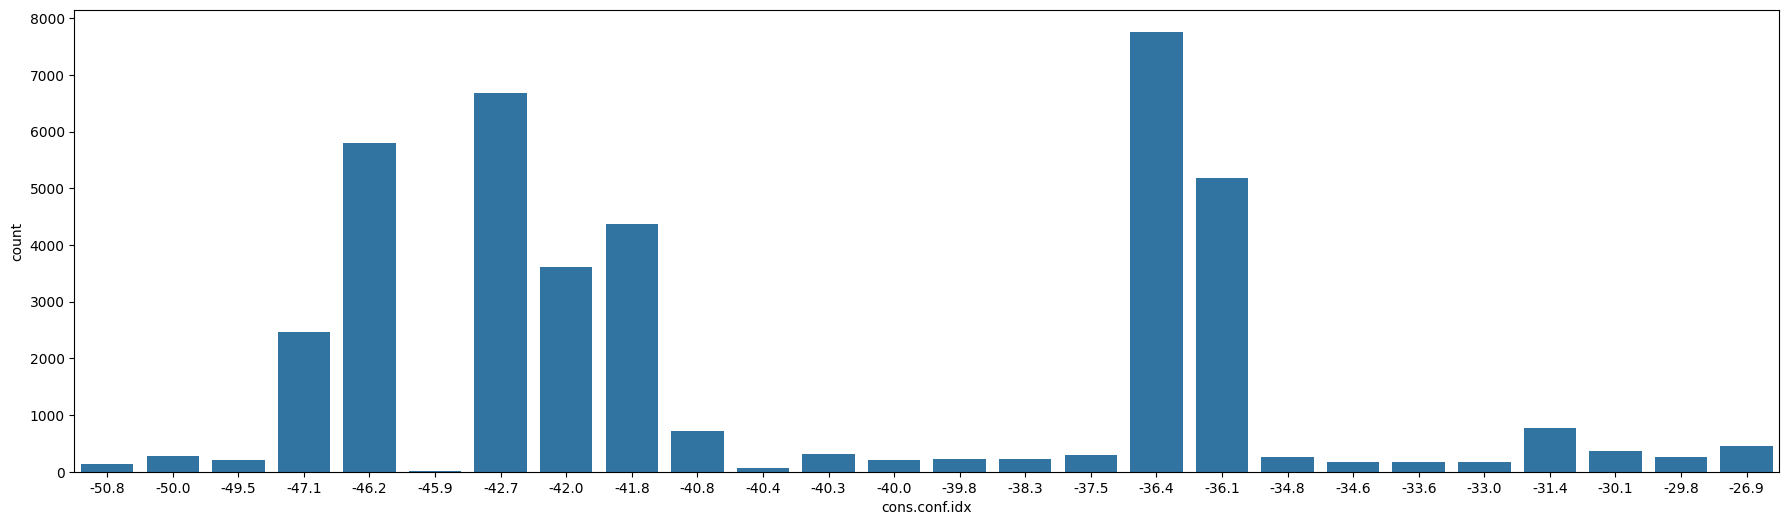

In [66]:
#cons.conf.idx bar plot

plt.figure(figsize=(22, 6))
sns.countplot(x='cons.conf.idx', data=df)
plt.show()

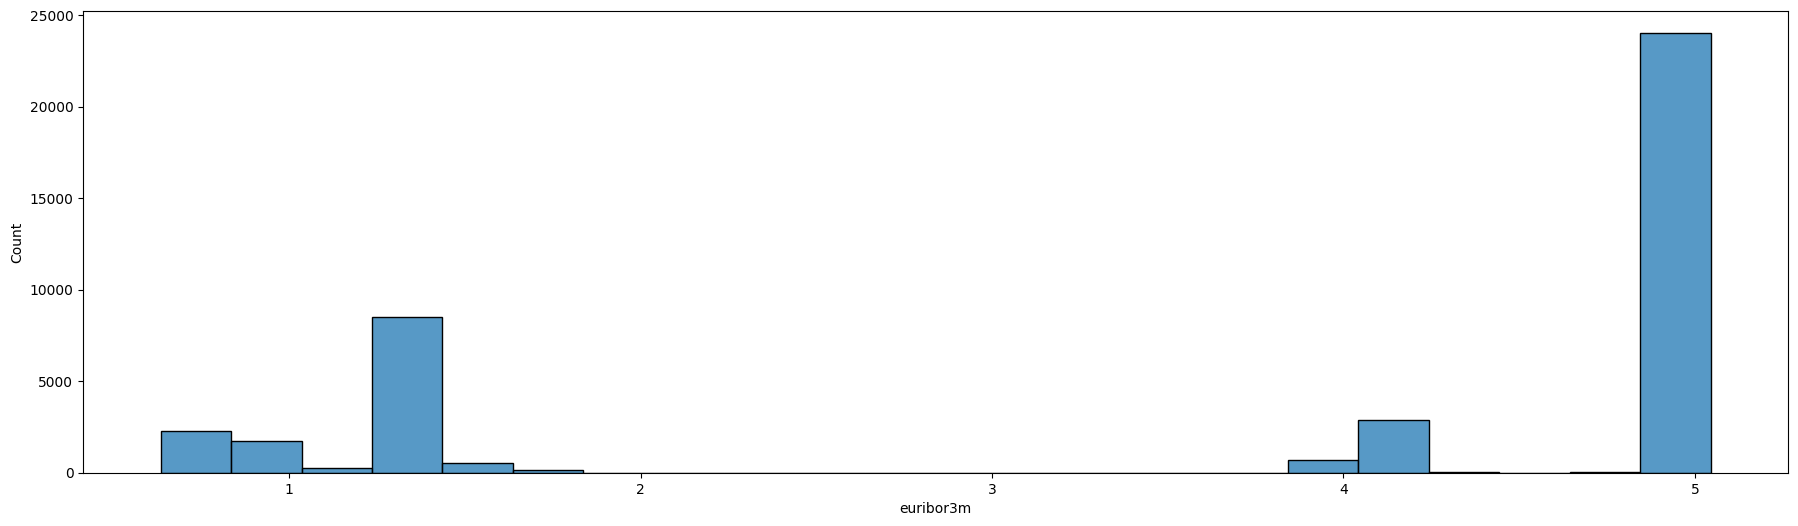

In [67]:
#euribor3m histogram

plt.figure(figsize=(22, 6))
sns.histplot(x = 'euribor3m',  data=df)
plt.show()

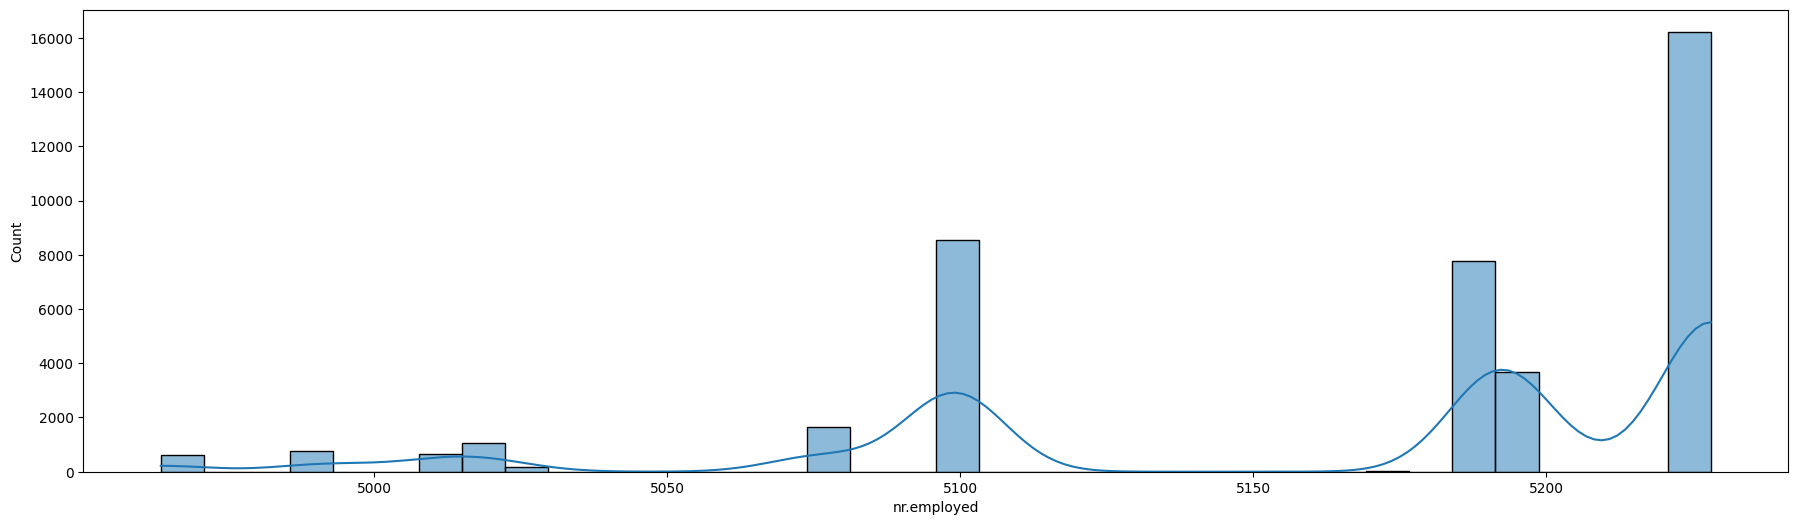

In [69]:
#nr.employed histogram

plt.figure(figsize=(22, 6))
sns.histplot(df['nr.employed'], kde=True)
plt.show()

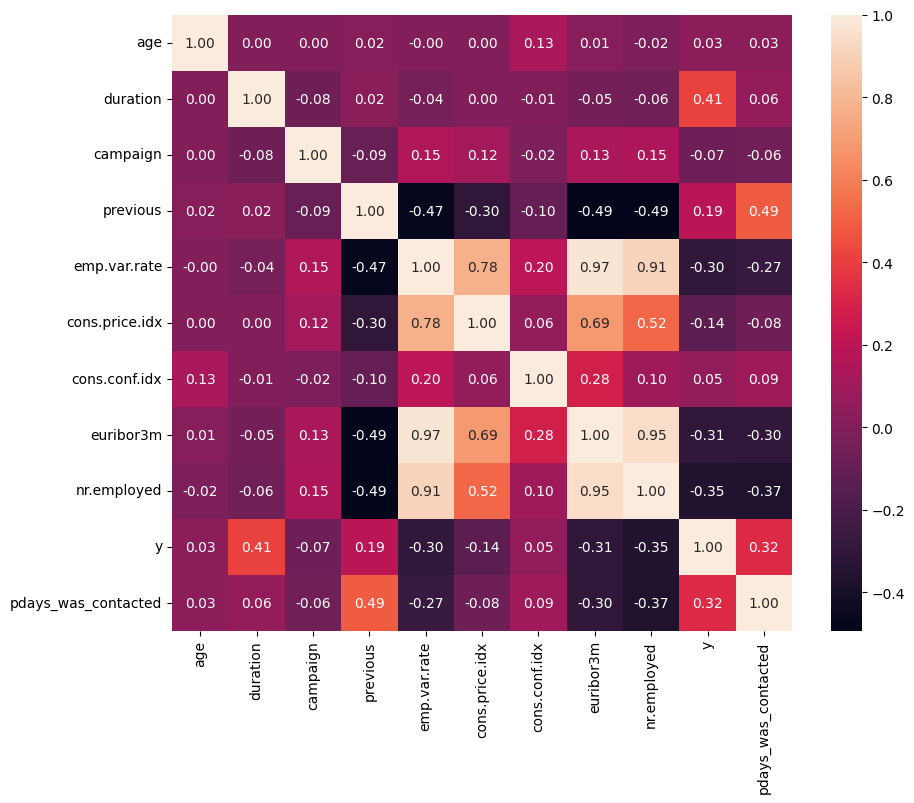

In [70]:
#corr matrix only for numberical and y

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

In [72]:
#save data

df.to_csv('data/cleaned_data.csv', index=False)

In [14]:
%pip install ydata-profiling==4.1.2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ydata-profiling==4.1.2 (from versions: none)
ERROR: No matching distribution found for ydata-profiling==4.1.2


In [15]:
from ydata_profiling import ProfileReport
df = pd.read_csv("data/bank-additional-full.csv", sep=';')
profile = ProfileReport(df)
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ydata_profiling'